### Homework 9

이번 과제에서는 Kalman Filtering, Smoothering을 비롯해 평활화에 관련된 문제를 실습해 보도록 한다

#### 1. Data Import

`pandas.read_csv()`를 이용해 아래의 두 가지 데이터를 준비하도록 한다

- Gold_USD.csv : 일별 금 가격 (Commodity)
- USD_KRW.csv : 일별 원-달러 환율

In [1]:
import numpy as np
import pandas as pd

gold = pd.read_csv('Gold_USD.csv', index_col = 0)
exchange = pd.read_csv('USD_KRW.csv', index_col = 0)

**1.1 Data Preprocessing**

준비된 데이터는 최근 날짜에서 과거날짜로, 즉, 역순으로 정렬되어 있다. 적절한 방법을 이용하여 데이터를 과거-현재 순으로 정렬하라

In [2]:
gold.index = pd.DatetimeIndex(gold.index)
gold = gold.sort_index(ascending = True)
gold

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-02,"1,528.10","1,521.00","1,534.00","1,519.70",270.55K,0.33%
2020-01-03,"1,552.40","1,531.70","1,556.60","1,530.40",436.74K,1.59%
2020-01-06,"1,568.80","1,562.70","1,590.90","1,562.30",558.97K,1.06%
2020-01-07,"1,574.30","1,567.40","1,579.20","1,557.00",435.87K,0.35%
2020-01-08,"1,560.20","1,578.80","1,613.30","1,553.40",813.41K,-0.90%
...,...,...,...,...,...,...
2023-09-21,"1,939.60","1,952.00","1,952.20","1,933.10",225.91K,-1.40%
2023-09-22,"1,945.60","1,939.60","1,949.10","1,939.60",139.93K,0.31%
2023-09-25,"1,936.60","1,944.70","1,946.80","1,933.80",164.26K,-0.46%


In [3]:
exchange.index = pd.DatetimeIndex(exchange.index)
exchange = exchange.sort_index(ascending = True)
exchange

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-01,"1,154.02","1,155.07","1,155.32","1,154.08",NaN,0.00%
2020-01-02,"1,157.35","1,155.02","1,161.15","1,153.48",NaN,0.29%
2020-01-03,"1,164.95","1,157.94","1,168.83","1,155.70",NaN,0.66%
2020-01-06,"1,166.94","1,165.89","1,172.99","1,165.78",NaN,0.17%
2020-01-07,"1,167.30","1,167.54","1,168.82","1,163.11",NaN,0.03%
...,...,...,...,...,...,...
2023-09-21,"1,339.00","1,333.44","1,344.65","1,331.67",NaN,0.46%
2023-09-22,"1,334.03","1,339.57","1,341.81","1,330.74",NaN,-0.37%
2023-09-25,"1,338.01","1,335.56","1,341.47","1,330.14",NaN,0.30%


**1.2 Datetime Index**

분석의 편리함을 위해 준비된 데이터의 index를 적절한 방법을 이용해 datetime index로 변환하라. pandas에는 이를 위한 method가 정의되어 있다 (검색을 추천함)

In [4]:
gold = gold.Price.str.replace(',','').astype(float)

In [5]:
exchange = exchange.Price.str.replace(',','').astype(float)

#### 2. State Space models

**2.1 $\mathrm{ARMA}$ models**

두 자료에 대하여 적절한 차수를 탐색해 $\mathrm{ARMA}$모형을 추정하라. 단, 가격은 종가를 기준으로 한다

Gold - USD

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [7]:
ret_gold = np.log(gold) - np.log(gold.shift())
ret_gold = ret_gold.dropna()

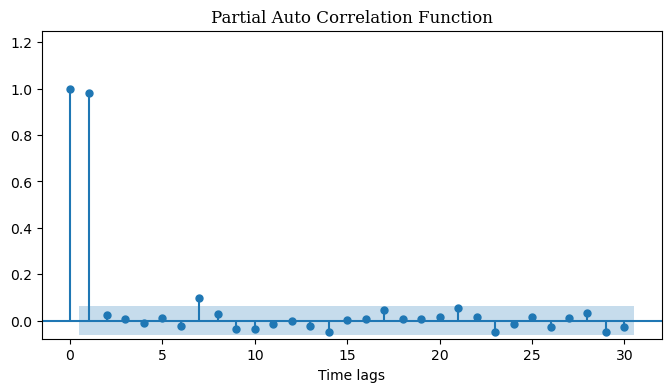

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(gold, auto_ylims = True, lags = 30, title = 'PACF of Tesla log Index', ax = ax)
plt.grid(False)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 12, fontfamily = 'Serif')
plt.show()

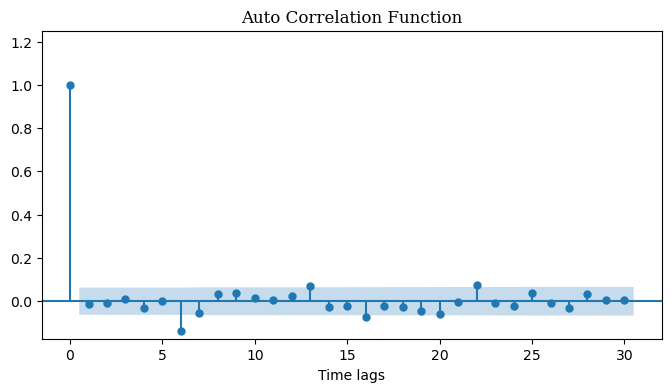

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(ret_gold, auto_ylims = True, lags = 30, title = 'ACF of Tesla return' , ax = ax)
plt.grid(False)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 12, fontfamily = 'Serif')
plt.show()

Gold에 대해서는 $\mathrm{ARMA}(1,6)$모형을 고려하도록 한다

Exchange rate

In [10]:
ret_exchange = np.log(exchange) - np.log(exchange.shift())
ret_exchange = ret_exchange.dropna()

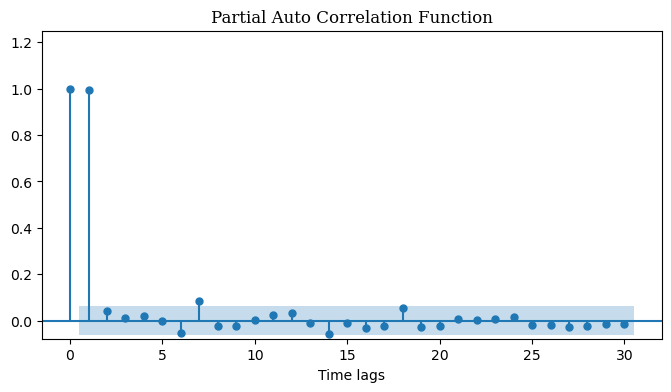

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(exchange, auto_ylims = True, lags = 30, title = 'PACF of Tesla log Index', ax = ax)
plt.grid(False)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 12, fontfamily = 'Serif')
plt.show()

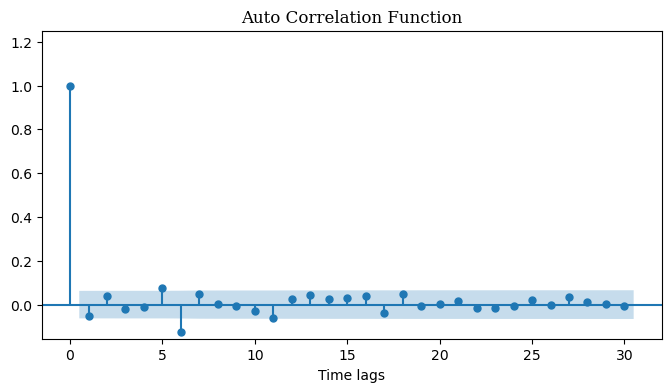

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(ret_exchange, auto_ylims = True, lags = 30, title = 'ACF of Tesla return' , ax = ax)
plt.grid(False)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 12, fontfamily = 'Serif')
plt.show()

환율에 대해서는 $\mathrm{ARMA}(1,6)$모형을 고려하도록 한다

In [13]:
import statsmodels.api as sm
gold_model = sm.tsa.ARIMA(gold, order = (1,0,6), trend = 'c').fit(method = 'innovations_mle')
print(gold_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  974
Model:                 ARIMA(1, 0, 6)   Log Likelihood               -4232.147
Date:                Wed, 04 Oct 2023   AIC                           8482.294
Time:                        02:56:35   BIC                           8526.226
Sample:                             0   HQIC                          8499.012
                                - 974                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1803.1791     49.894     36.140      0.000    1705.389    1900.969
ar.L1          0.9920      0.004    248.766      0.000       0.984       1.000
ma.L1         -0.0299      0.029     -1.034      0.3

In [14]:
import statsmodels.api as sm
ex_model = sm.tsa.ARIMA(exchange, order = (1,0,6), trend = 'c').fit(method = 'innovations_mle')
print(ex_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  976
Model:                 ARIMA(1, 0, 6)   Log Likelihood               -3278.790
Date:                Wed, 04 Oct 2023   AIC                           6575.581
Time:                        02:56:35   BIC                           6619.532
Sample:                    01-01-2020   HQIC                          6592.305
                         - 09-27-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1237.2301     64.805     19.091      0.000    1110.214    1364.246
ar.L1          0.9973      0.003    386.950      0.000       0.992       1.002
ma.L1         -0.0262      0.027     -0.987      0.3

**2.2 Kalman Filtering**

준비된 `SpectralAnalysisStateSpaceModel.py`를 활용하여 Kalman Filtering을 수행하라. **2.1**에서 추정한 $\mathrm{ARMA}$모형과 비교하라. $\mathrm{ARMA}$모형은 state space model이라고 볼 수 있는가?

In [15]:
import SpectralAnalysisStateSpaceModel as sas

gold_linear_trend = sas.LocalLinearTrend(gold)
gold_kalman = gold_linear_trend .fit(disp = True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48816D+00    |proj g|=  1.25711D-02

At iterate    1    f=  4.47340D+00    |proj g|=  1.12516D-02

At iterate    2    f=  4.44956D+00    |proj g|=  1.70088D-02

At iterate    3    f=  4.43132D+00    |proj g|=  7.41136D-03

At iterate    4    f=  4.37598D+00    |proj g|=  9.49703D-03

At iterate    5    f=  4.37559D+00    |proj g|=  1.10539D-02

At iterate    6    f=  4.36549D+00    |proj g|=  7.66672D-03

At iterate    7    f=  4.35044D+00    |proj g|=  1.23772D-02

At iterate    8    f=  4.34880D+00    |proj g|=  2.81484D-03

At iterate    9    f=  4.34852D+00    |proj g|=  4.11189D-03

At iterate   10    f=  4.34841D+00    |proj g|=  3.03197D-04

At iterate   11    f=  4.34839D+00    |proj g|=  2.28547D-04

At iterate   12    f=  4.34839D+00    |proj g|=  3.32765D-05

At iterate   13    f=  4.3

 This problem is unconstrained.


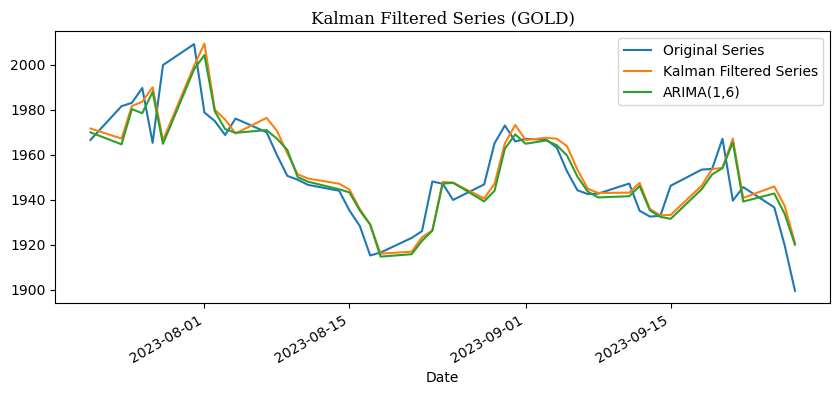

In [16]:
gold_predict = gold_kalman.get_prediction()
plotting = pd.DataFrame({"Original Series": gold[-50:],
                         "Kalman Filtered Series": gold_predict.predicted_mean[-50:],
                         "ARIMA(1,6)" : gold_model.fittedvalues[-50:]})
plotting.plot(figsize = (10, 4))
plt.title("Kalman Filtered Series (GOLD)", fontfamily = 'Serif', fontsize = 12)
plt.grid(False)

In [17]:
ex_linear_trend = sas.LocalLinearTrend(exchange)
ex_kalman = ex_linear_trend.fit(disp = True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05111D+00    |proj g|=  4.33049D-02

At iterate    1    f=  3.54570D+00    |proj g|=  5.20045D-02

At iterate    2    f=  3.52111D+00    |proj g|=  4.59537D-02

At iterate    3    f=  3.47159D+00    |proj g|=  1.73677D-02

At iterate    4    f=  3.46084D+00    |proj g|=  2.07227D-02

At iterate    5    f=  3.44503D+00    |proj g|=  1.47581D-02

At iterate    6    f=  3.43324D+00    |proj g|=  3.10202D-02

At iterate    7    f=  3.42479D+00    |proj g|=  3.40510D-02

At iterate    8    f=  3.40240D+00    |proj g|=  3.82603D-02

At iterate    9    f=  3.38604D+00    |proj g|=  2.61869D-02

At iterate   10    f=  3.38281D+00    |proj g|=  2.49890D-02

At iterate   11    f=  3.37021D+00    |proj g|=  1.41925D-02

At iterate   12    f=  3.36660D+00    |proj g|=  1.41504D-02

At iterate   13    f=  3.3

 This problem is unconstrained.


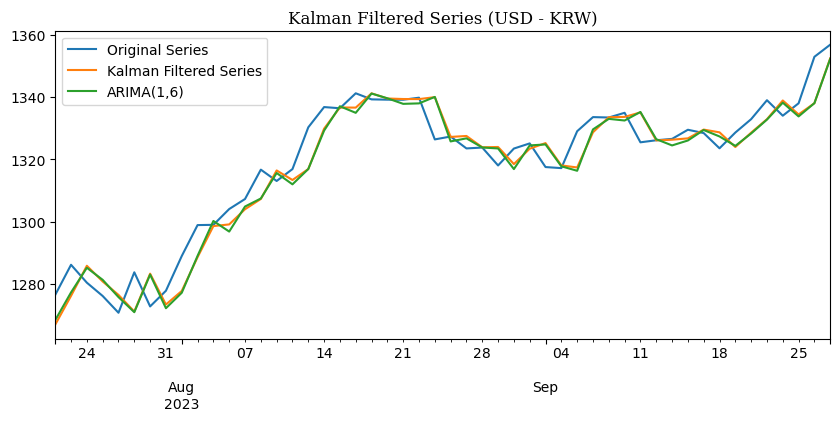

In [18]:
ex_predict = ex_kalman.get_prediction()
plotting = pd.DataFrame({"Original Series": exchange[-50:],
                         "Kalman Filtered Series": ex_predict.predicted_mean[-50:],
                         "ARIMA(1,6)" : ex_model.fittedvalues[-50:]})
plotting.plot(figsize = (10, 4))
plt.title("Kalman Filtered Series (USD - KRW)", fontfamily = 'Serif', fontsize = 12)
plt.grid(False)

두 시계열 모두 Kalman Filter와 ARMA모형이 별 차이가 없는 것을 알 수 있다. 따라서, ARMA모형은 Kalman filter모형의 일종이라고 볼 수 있다

#### 3. Kalman Smoothing

**3.1 Estimate Kalman Smoother**

아래의 함수를 이용하여 USD/KRW과 GOLD 가격에 대해 Kalman Smoothing을 진행하라. 단, q = 0.001로 지정한다.

In [19]:
from statsmodels.tsa.statespace.mlemodel import MLEModel
def kalman_smoothing(close : pd.Series, 
                     q : float, dt : float = 1.0, s : float = 0.5,
                     A : np.array = np.array([[1]]), 
                     Q : np.array = np.array([[1]]), 
                     H : np.array = np.array([[1]]), 
                     R : np.array = np.eye(1),
                     m0 : np.array = np.array([[1]]),
                     P0 : np.array = np.eye(1),
                     k_state : int = 1) -> pd.DataFrame :
    Q = q * Q
    R = s ** 2 * R

    kf = MLEModel(close, k_states = k_state)
    kf._state_names = ['x1']
    kf['design'] = H
    kf['obs_cov'] = R
    kf['transition'] = A
    kf['selection'] = np.eye(1)
    kf['state_cov'] = Q

    kf.initialize_known(A @ m0[:, 0], A @ P0 @ A.T + Q)
    res = kf.smooth(params = [])
    output = pd.DataFrame(res.states.smoothed.x1.values, index = close.index, columns = ['smoothered'])
    
    return output

Text(0.5, 1.0, 'Kalman Smoothing (Gold)')

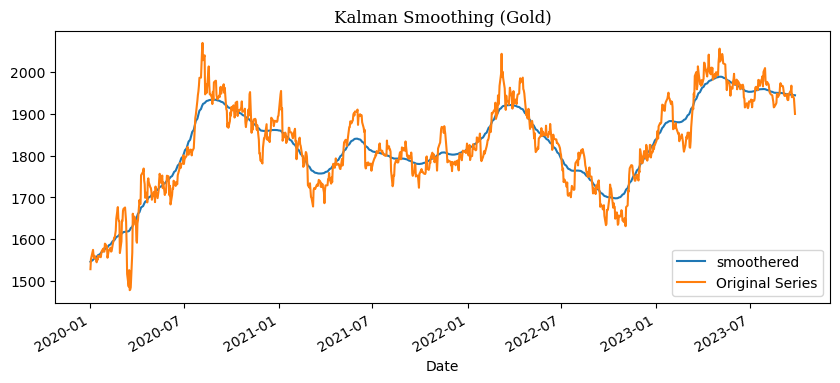

In [20]:
gold_smoothing = kalman_smoothing(gold, q = 0.001)
gold_smoothing.plot(grid = False, figsize = (10, 4))
gold.plot(grid = False, label = 'Original Series')
plt.legend()
plt.title('Kalman Smoothing (Gold)', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Kalman Smoothing (USD-KRW)')

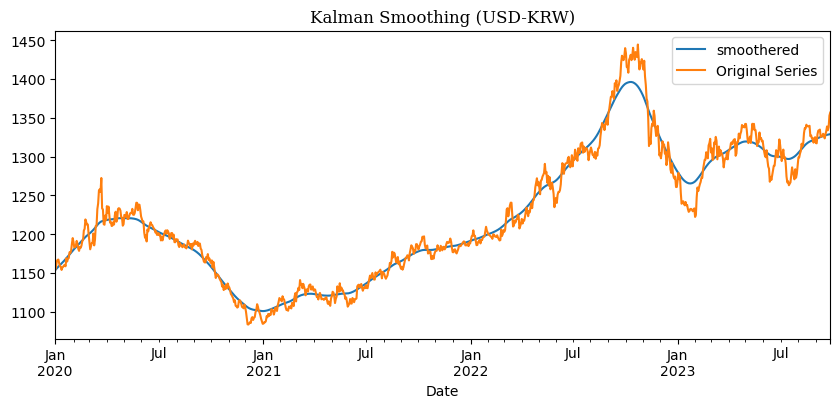

In [21]:
ex_smoothing = kalman_smoothing(exchange, q = 0.001)
ex_smoothing.plot(grid = False, figsize = (10, 4))
exchange.plot(grid = False, label = 'Original Series')
plt.legend()
plt.title('Kalman Smoothing (USD-KRW)', fontsize = 12, fontfamily = 'Serif')

**3.2 plotting**

kalman smoothe된 두 변수를 plotting하라. 비슷한 추세를 가지고 있는가?

Text(0.5, 1.0, 'Kalman Smoothing time series')

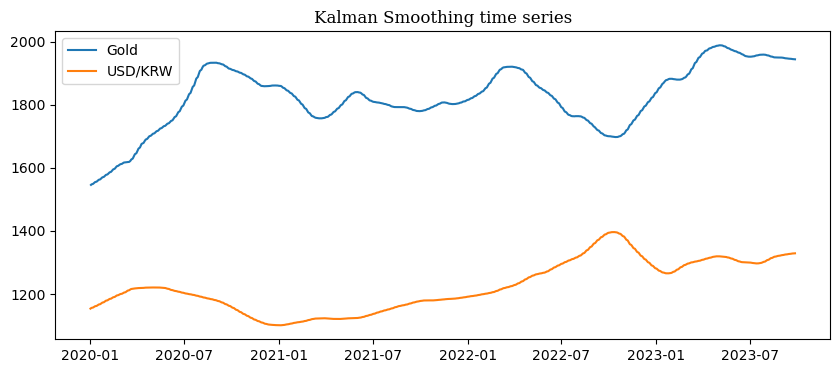

In [22]:
plt.figure(figsize = (10, 4))
plt.plot(gold_smoothing, label = 'Gold')
plt.plot(ex_smoothing, label = 'USD/KRW')
plt.grid(False)
plt.legend()
plt.title('Kalman Smoothing time series', fontsize = 12, fontfamily = 'Serif')

#### 4. Kernel Smoothing

Locally Weighted Scatterplot Smoothing(LOESS, 국소회귀평활화)은 smoothing방법 중 하나이다. 자세한 내용은 아래 article를 참조하도록 하자

https://towardsdatascience.com/loess-373d43b03564

`statsmodels.api.nonparametric.lowess`에서는 LOESS평활화를 추정할 수 있다. `lowess()`함수의 대표적인 parameter는 아래와 같다

```python
statsmodels.nonparametric.smoothers_lowess.lowess(
    endog, 
    exog, 
    frac = 0.6666666666666666, 
    it=3, 
    delta=0.0, 
    xvals=None, 
    is_sorted=False, 
    missing='drop', 
    return_sorted=True)
```

endog에는 가격계열의 pandas.Series를 지정하고, exog에는 `np.arange(len(pd.Series))`를 지정하면 된다. `frac`은 평활화에 가장 중요한 역할을 하는 parameter로, **지정한 값 만큼 local band를 지정하여 회귀를 진행**한다. 예를 들어, `frac=1`인 경우 전 구간에서 회귀를 진행하는 것이고, `frac=0.5`를 지정하면 전 구간에서 절반의 기간만큼 회귀를 진행한다

`frac=0.1`을 지정하여 USD/KRW과 GOLD가격 데이터에 대한 smoothing을 진행하고 3번의 결과와 비교하라. 어떠한 차이가 있는가?

Text(0.5, 1.0, 'LOESS Smoothing (Gold)')

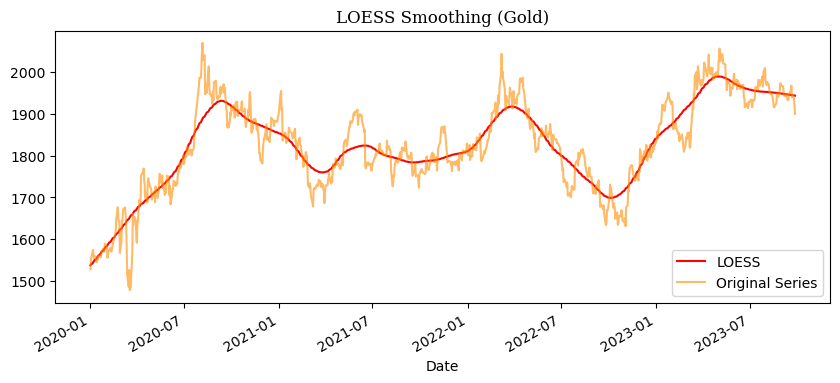

In [23]:
import statsmodels.api as sm

loess_gold = sm.nonparametric.lowess(gold, np.arange(len(gold)), frac = 0.1)
loess_gold = pd.DataFrame(loess_gold[:,1], columns = ['LOESS'], index = gold.index)

loess_gold.plot(grid = False, figsize = (10, 4), label = 'LOESS smoother', color = 'red')
gold.plot(grid = False, label = 'Original Series', color = 'darkorange', alpha = 0.6)
plt.legend()
plt.title('LOESS Smoothing (Gold)', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'LOESS Smoothing (USD-KRW)')

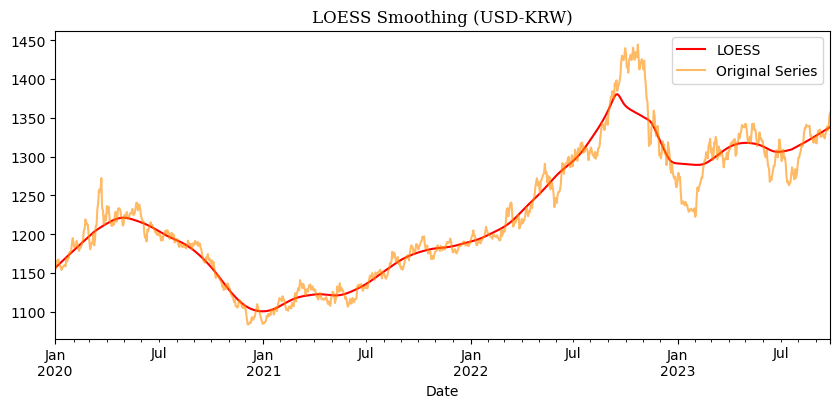

In [24]:
loess_ex = sm.nonparametric.lowess(exchange, np.arange(len(exchange)), frac = 0.1)
loess_ex = pd.DataFrame(loess_ex[:,1], columns = ['LOESS'], index = exchange.index)

loess_ex.plot(grid = False, figsize = (10, 4), label = 'LOESS smoother', color = 'red')
exchange.plot(grid = False, label = 'Original Series', color = 'darkorange', alpha = 0.6)
plt.legend()
plt.title('LOESS Smoothing (USD-KRW)', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Kalman Smoothing versus LOESS Smoothing (Gold)')

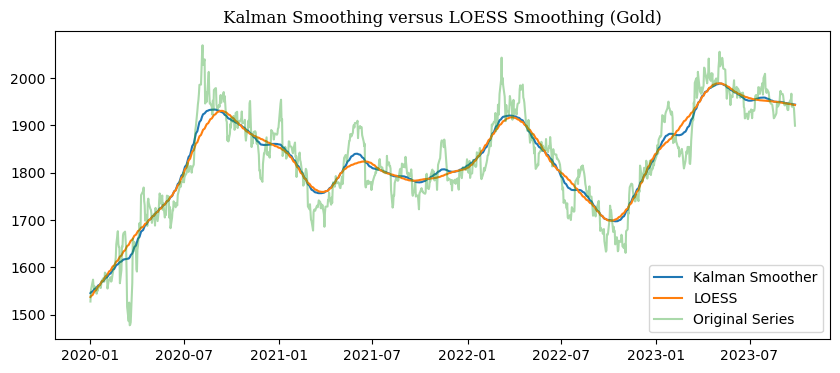

In [25]:
plt.figure(figsize = (10, 4))
plt.plot(gold_smoothing, label = 'Kalman Smoother')
plt.plot(loess_gold, label = 'LOESS')
plt.plot(gold, alpha = 0.4, label = 'Original Series')
plt.grid(False)
plt.legend()
plt.title('Kalman Smoothing versus LOESS Smoothing (Gold)', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Kalman Smoothing versus LOESS Smoothing (USD-KRW)')

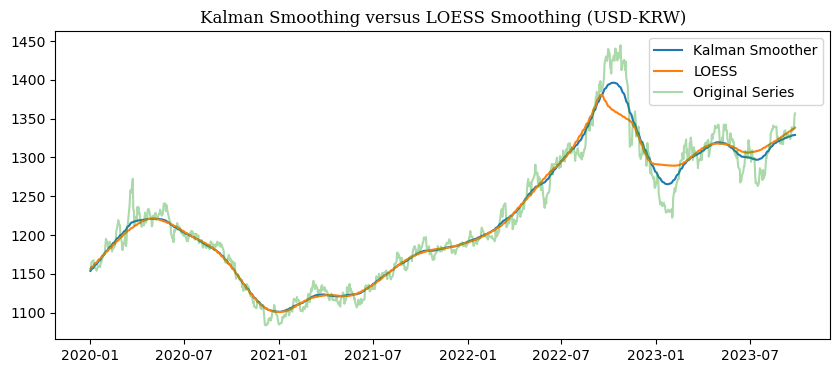

In [26]:
plt.figure(figsize = (10, 4))
plt.plot(ex_smoothing, label = 'Kalman Smoother')
plt.plot(loess_ex, label = 'LOESS')
plt.plot(exchange, alpha = 0.4, label = 'Original Series')
plt.grid(False)
plt.legend()
plt.title('Kalman Smoothing versus LOESS Smoothing (USD-KRW)', fontsize = 12, fontfamily = 'Serif')

비모수추정법인 LOESS smoothing은 급격한 변동 국면에서 oversmoothed하는 경향이 있으므로, paramter 조정이 중요하다

#### 5. Structural Change

Smoothing의 가장 큰 장점은 시장의 국면을 쉽게 판단할 수 있다는 것이다. smoothing 결과로 본 USD/KRW 시장과 GOLD가격 시장은 어느 시기가 활황이었고, 어느 시기가 불황이었는가?
이 시기는 전세계적으로 경기 침체가 일어난 시기와 어떠한 관계가 있는가?

Text(0.5, 1.0, 'Smoothing Results')

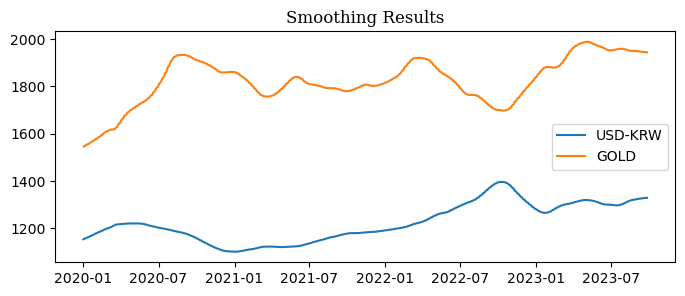

In [27]:
plt.figure(figsize = (8, 3))
plt.plot(ex_smoothing, label = 'USD-KRW')
plt.plot(gold_smoothing, label = 'GOLD')
plt.grid(False)
plt.legend()
plt.title('Smoothing Results', fontsize = 12, fontfamily = 'Serif')